# Importing Libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler 
import numpy as np
from sklearn.model_selection import train_test_split
import os, cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D

In [93]:
import os
import tensorflow.keras as keras
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import numpy as np
import tensorflow.keras as keras
import tensorflow as tf
from keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Input, Masking
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.image as mpimg

**Visualisation**

('nv', ' melanocytic nevi')
('nv', ' melanocytic nevi')
('nv', ' melanocytic nevi')
('nv', ' melanocytic nevi')
('bcc', ' basal cell carcinoma')
('nv', ' melanocytic nevi')
('nv', ' melanocytic nevi')
('nv', ' melanocytic nevi')
('nv', ' melanocytic nevi')
('bcc', ' basal cell carcinoma')
('nv', ' melanocytic nevi')


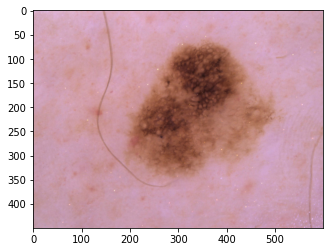

In [102]:

srcdir = '/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1'
count=0
for temp in os.listdir(srcdir):
    img = cv2.imread(os.path.join(srcdir, temp))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    img = cv2.resize(img, (28, 28))
    result = model.predict(img.reshape(1, 28, 28, 3))
    max_prob = max(result[0])
    class_ind = list(result[0]).index(max_prob)
    class_name = classes[class_ind]
    print(class_name)
    count+=1
    if count>10:
        break


# Import Data

In [2]:
import pandas as pd
data = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv')
data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [4]:
y = data['label']
x = data.drop(columns = ['label'])

# Exploratory Data Analysis (EDA)

In [86]:
tabular_data = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv')
tabular_data.head(10)

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
5,HAM_0001466,ISIC_0027850,bkl,histo,75.0,male,ear
6,HAM_0002761,ISIC_0029176,bkl,histo,60.0,male,face
7,HAM_0002761,ISIC_0029068,bkl,histo,60.0,male,face
8,HAM_0005132,ISIC_0025837,bkl,histo,70.0,female,back
9,HAM_0005132,ISIC_0025209,bkl,histo,70.0,female,back


In [87]:
classes = {4: ('nv', ' melanocytic nevi'), 6: ('mel', 'melanoma'), 2 :('bkl', 'benign keratosis-like lesions'), 1:('bcc' , ' basal cell carcinoma'), 5: ('vasc', ' pyogenic granulomas and hemorrhage'), 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),  3: ('df', 'dermatofibroma')}

# Frequency Distribution of Classes

Text(0.5, 1.0, 'Frequency Distribution of Classes')

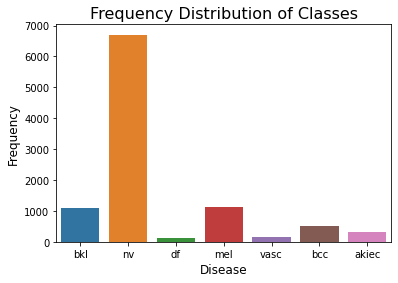

In [7]:
sns.countplot(x = 'dx', data = tabular_data)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Frequency Distribution of Classes', size=16)

# Distribution of Disease over Gender

Text(0.5, 1.0, 'Gender of Patient')

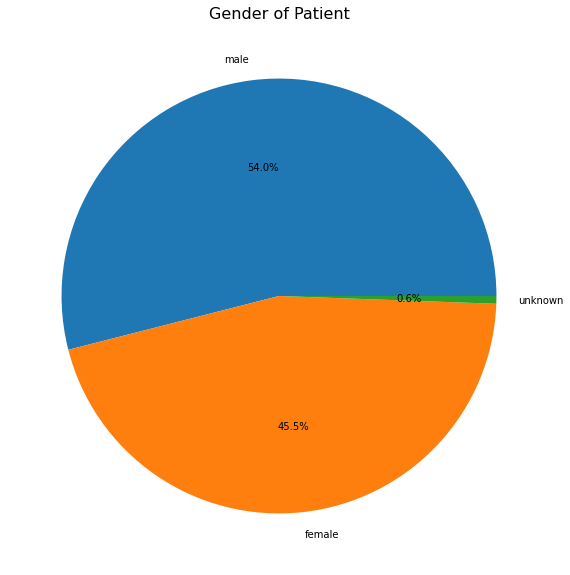

In [8]:
bar, ax = plt.subplots(figsize = (10,10))
plt.pie(tabular_data['sex'].value_counts(), labels = tabular_data['sex'].value_counts().index, autopct="%.1f%%")
plt.title('Gender of Patient', size=16)

# Histogram of Age of Patients

Text(0.5, 1.0, 'Histogram of Age of Patients')

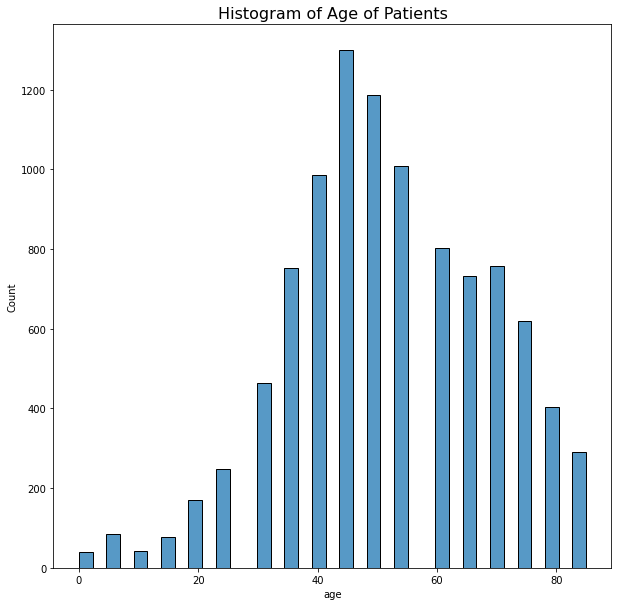

In [9]:
bar, ax = plt.subplots(figsize=(10,10))
sns.histplot(tabular_data['age'])
plt.title('Histogram of Age of Patients', size=16)

# Location of disease over Gender

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'back'),
  Text(1, 0, 'lower extremity'),
  Text(2, 0, 'trunk'),
  Text(3, 0, 'upper extremity'),
  Text(4, 0, 'abdomen'),
  Text(5, 0, 'face'),
  Text(6, 0, 'chest'),
  Text(7, 0, 'foot'),
  Text(8, 0, 'scalp'),
  Text(9, 0, 'neck'),
  Text(10, 0, 'unknown'),
  Text(11, 0, 'hand'),
  Text(12, 0, 'genital'),
  Text(13, 0, 'ear'),
  Text(14, 0, 'acral')])

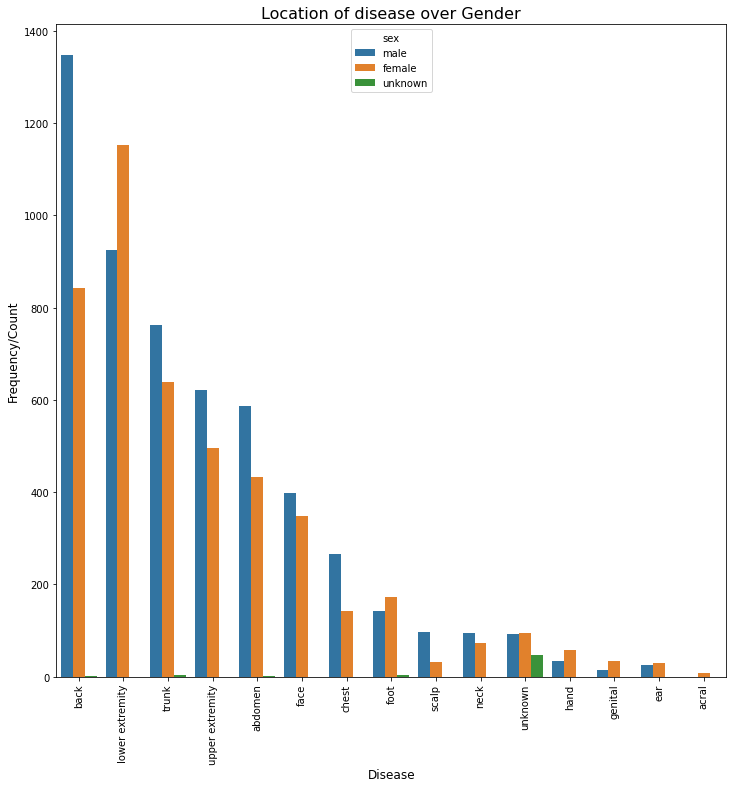

In [10]:
value = tabular_data[['localization', 'sex']].value_counts().to_frame()
value.reset_index(level=[1,0 ], inplace=True)
temp = value.rename(columns = {'localization':'location', 0: 'count'})

bar, ax = plt.subplots(figsize = (12, 12))
sns.barplot(x = 'location',  y='count', hue = 'sex', data = temp)
plt.title('Location of disease over Gender', size = 16)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency/Count', size=12)
plt.xticks(rotation = 90)

# Oversampling
**To overcome class imbalace**

In [11]:
oversample = RandomOverSampler()
x,y  = oversample.fit_resample(x,y)

In [12]:
x = np.array(x).reshape(-1,28,28,3)
print('Shape of X :',x.shape)

Shape of X : (46935, 28, 28, 3)


# Standardization and Splitting Data

In [13]:
x = (x-np.mean(x))/np.std(x)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=1)

# Model Training

In [75]:
from keras.models import Model
# Input layer
inputs = Input(shape=(28, 28, 3))

# First convolutional layer
conv1 = Conv2D(16, (3, 3), strides=2, padding='valid', activation='relu')(inputs)
pool1 = MaxPool2D((3, 3), strides=2)(conv1)

# Second convolutional layer
conv2 = Conv2D(32, (3, 3), strides=1, padding='valid', activation='relu')(pool1)
pool2 = MaxPool2D((3, 3), strides=2)(conv2)

conv3 = Conv2D(64, (3, 3), strides=1, padding='valid', activation='relu')(pool1)
pool3 = MaxPool2D((3, 3), strides=2)(conv2)

conv4 = Conv2D(64, (3, 3), strides=1, padding='valid', activation='relu')(pool1)
# Flatten the output from the convolutional layers
flatten = Flatten()(conv4)

# Fully connected layers
fc1 = Dense(128, activation='relu')(flatten)
fc2=Dense(32,activation='relu')(fc1)
output = Dense(7, activation='softmax')(fc2)

# Define the model
model = Model(inputs=inputs, outputs=output)
model.summary()
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 28, 28, 3)]       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 13, 13, 16)        448       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 4, 4, 64)          9280      
_________________________________________________________________
flatten_10 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_34 (Dense)             (None, 128)               131200    
_________________________________________________________________
dense_35 (Dense)             (None, 32)                4128

In [76]:

callback = EarlyStopping(monitor="val_loss",min_delta=0.0001, verbose = 0, restore_best_weights=True, patience = 2)
# Train the model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10000, batch_size=32,callbacks=callback,shuffle = True)
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

Epoch 1/10000
1174/1174 [==============================] - 9s 7ms/step - loss: 1.2413 - accuracy: 0.5150 - val_loss: 0.6467 - val_accuracy: 0.7469
Epoch 2/10000
1174/1174 [==============================] - 8s 7ms/step - loss: 0.5419 - accuracy: 0.7969 - val_loss: 0.4226 - val_accuracy: 0.8381
Epoch 3/10000
1174/1174 [==============================] - 8s 7ms/step - loss: 0.3373 - accuracy: 0.8746 - val_loss: 0.2898 - val_accuracy: 0.8897
Epoch 4/10000
1174/1174 [==============================] - 8s 7ms/step - loss: 0.2439 - accuracy: 0.9116 - val_loss: 0.2082 - val_accuracy: 0.9265
Epoch 5/10000
1174/1174 [==============================] - 8s 7ms/step - loss: 0.1778 - accuracy: 0.9366 - val_loss: 0.1841 - val_accuracy: 0.9367
Epoch 6/10000
1174/1174 [==============================] - 8s 7ms/step - loss: 0.1422 - accuracy: 0.9490 - val_loss: 0.1921 - val_accuracy: 0.9344
Epoch 7/10000
1174/1174 [==============================] - 8s 7ms/step - loss: 0.1286 - accuracy: 0.9535 - val_loss: 0

# Plot Accuracy and Loss

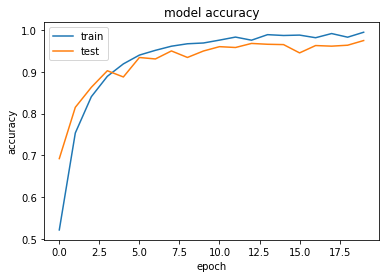

In [80]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

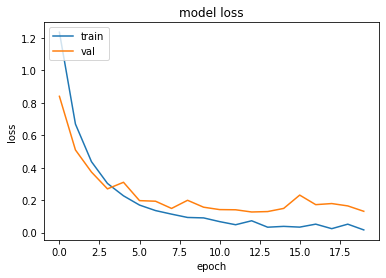

In [79]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Model Testing

In [82]:
loss, acc = model.evaluate(X_test, Y_test, verbose=2)

294/294 - 1s - loss: 0.1128 - accuracy: 0.9665


294/294 [==============================] - 1s 3ms/step


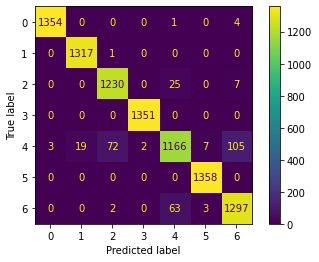

In [85]:
predictions = model.predict(X_test, verbose=1)
p_class = np.argmax(predictions, axis=1)
# cm = tf.math.confusion_matrix(test_label, p_class)
cm = confusion_matrix(Y_test, p_class)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()
plt.show()